В цьому наборі завдань закріпимо те, що було на лекції з Computer Vision.

# Computer Vision with PyTorch


## 1. Наведіть 3 галузі промисловості, де комп'ютерний зір використовується сьогодні (можна згадати з лекції, або провести міні-рісерч).

1. Контроль якості на виробництві
2. Автомобільна промисловість
3. Військова галузь

## 2. Виділіть 20 хвилин аби ознайомитись та переглянути сайт [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

* Завантажте власне будь-яке зображення за допомогою кнопки Upload" на сайті та подивіться, що відбувається на кожному шарі CNN, коли ваше зображення проходить через нього.

Напишіть 3 пункти, що ви дізнались після цієї вправи?

1. Глибші шари розпізнають складніші ознаки. На початкових шарах нейронна мережа розпізнає прості візерунки. А на глибших шарах з’являються більш складні та абстрактні ознаки, частини зображення.
2. Кожен фільтр "відповідає" за виявлення певного типу ознак. На сайті видно, як різні фільтри реагують на різні частини зображення, підсилюючи або приглушуючи окремі його елементи.
3. Згортка (convolution) витягує ознаки з зображення, а pooling (максимальне зменшення) — зменшує розмір просторових даних, зберігаючи найважливішу інформацію.

## 3. Завантажте навчальні та тестові набори даних [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

MNIST - базовий набір даних для задач Computer Vision. Часто використовується для навчання.

- Виведіть, скільки елементів в кожному наборі.
- Покажіть формат (розмірності) кожної картинки.
- Виведіть, які класи представлені в цьому наборі даних.

In [32]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 657.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.1 MB/s eta 0:00:00


In [1]:
import random
import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

import matplotlib.pyplot as plt

from timeit import default_timer as timer
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(f"PyTorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"Device: {device}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124
Device: cuda


In [2]:
train_data = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 52.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.72MB/s]


In [ ]:
print(f"Train data: {len(train_data.data)} items")
print(f"Test data: {len(test_data.data)} items")

Train data: 60000 items
Test data: 10000 items


In [ ]:
print(f"The shape of each image: {train_data[0][0].shape}")

The shape of each image: torch.Size([1, 28, 28])


In [3]:
class_names = train_data.classes
print(f"Class names: {class_names}")

Class names: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


## 4. Візуалізуйте щонайменше 5 різних зразків з навчального набору даних MNIST.

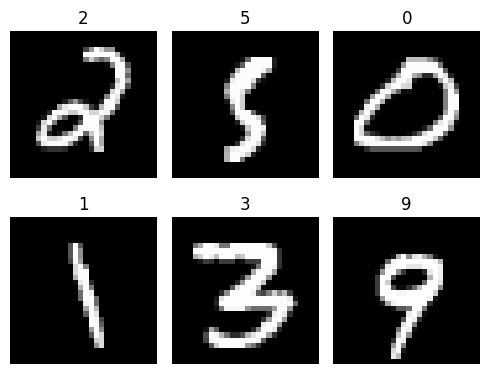

In [ ]:
torch.manual_seed(7)

fig = plt.figure(figsize=(5, 4))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(label)
    plt.axis(False)
plt.tight_layout()
plt.show()

## 5. Перетворіть навчальні та тестові набори даних MNIST у data loaders за допомогою `torch.utils.data.DataLoader`, встановіть `batch_size=32`.
- Покажіть, яку форму даних вертають дата лоадери.

In [4]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght train dataloader: {len(train_dataloader)} партій по {BATCH_SIZE}")
print(f"Lenght test dataloader: {len(test_dataloader)} партій по {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x793250303890>, <torch.utils.data.dataloader.DataLoader object at 0x793250470d10>)
Lenght train dataloader: 1875 партій по 32
Lenght test dataloader: 313 партій по 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 6. Відтворіть `ModelV2`, яку ми розглядали на лекції
Це до слова та сама модель з [сайту CNN Explainer](https://poloclub.github.io/cnn-explainer/), також відома як TinyVGG і вона здатна навчатися на наборі даних MNIST.

Напишіть клас моделі.

In [5]:
class MNISTModel(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [6]:
torch.manual_seed(7)
model = MNISTModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7. Навчіть модель, яку ви побудували в попередній вправі, протягом 5 епох на CPU та GPU і подивіться, скільки часу це займе в кожному з варіантів.

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [8]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [9]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc= 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [10]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Training time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
print(device)

cpu


In [11]:
torch.manual_seed(7)
train_time_start_model = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(data_loader=train_dataloader,
               model=model,
               loss_fn = loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=model,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                              end=train_time_end_model,
                                              device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.30542 | Train accuracy: 90.15%
Test loss: 0.06598 | Test accuracy: 97.93%

Epoch: 1
-------
Train loss: 0.07230 | Train accuracy: 97.75%
Test loss: 0.07873 | Test accuracy: 97.43%

Epoch: 2
-------
Train loss: 0.05641 | Train accuracy: 98.26%
Test loss: 0.04159 | Test accuracy: 98.55%

Epoch: 3
-------
Train loss: 0.04699 | Train accuracy: 98.51%
Test loss: 0.03845 | Test accuracy: 98.68%

Epoch: 4
-------
Train loss: 0.04108 | Train accuracy: 98.74%
Test loss: 0.04082 | Test accuracy: 98.63%

Training time on cpu: 290.233 seconds


In [ ]:
device

'cuda'

In [ ]:
torch.manual_seed(7)
model = MNISTModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [ ]:
train_time_start_model = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(data_loader=train_dataloader,
               model=model,
               loss_fn = loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=model,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                              end=train_time_end_model,
                                              device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.30445 | Train accuracy: 89.97%
Test loss: 0.05928 | Test accuracy: 97.97%

Epoch: 1
-------
Train loss: 0.07188 | Train accuracy: 97.77%
Test loss: 0.07484 | Test accuracy: 97.45%

Epoch: 2
-------
Train loss: 0.05630 | Train accuracy: 98.25%
Test loss: 0.04017 | Test accuracy: 98.63%

Epoch: 3
-------
Train loss: 0.04599 | Train accuracy: 98.55%
Test loss: 0.03851 | Test accuracy: 98.69%

Epoch: 4
-------
Train loss: 0.04184 | Train accuracy: 98.70%
Test loss: 0.04182 | Test accuracy: 98.59%

Training time on cuda: 57.409 seconds


## 8. Зробіть прогнози за допомогою вашої навченої моделі та візуалізуйте принаймні 5 з них, порівнюючи прогноз з цільовою міткою.

In [27]:
def make_prediction(model: torch.nn.Module,
                    sample,
                    device: torch.device = device):
    model.eval()
    with torch.inference_mode():
        sample = torch.unsqueeze(sample, dim=0).to(device)

        pred_logit = model(sample)
        pred_class = torch.softmax(pred_logit.squeeze(), dim=0).argmax(dim=0).cpu()

    return pred_class


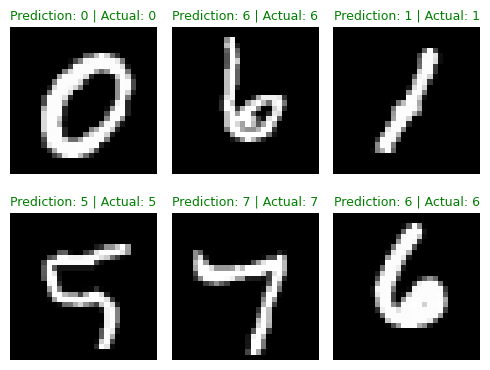

In [31]:
random.seed(7)

fig = plt.figure(figsize=(5, 4))
rows, cols = 2, 3
for i, (sample, label) in enumerate(random.sample(list(test_data), k=rows*cols)):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = make_prediction(model, sample, device)
    title_text = f"Prediction: {pred_label} | Actual: {label}"
    if pred_label == label:
        plt.title(title_text, fontsize=9, c='g')
    else:
        plt.title(title_text, fontsize=9, c='r')

    plt.axis(False)
plt.tight_layout()
plt.show()

## 9. Побудуйте матрицю плутанини, порівнюючи передбачення вашої моделі з істинними мітками.

In [35]:
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

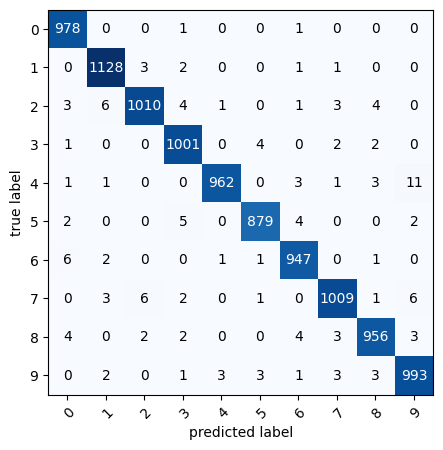

In [43]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=np.arange(0, 10, 1).tolist(),
    figsize=(7, 5)
)
plt.show()

## 10. Виведіть принаймні 9 прикладів, де модель помиляється, разом з тим, якою мала бути мітка зображення.
* Після візуалізації цих прогнозів, як ви думаєте, це більше помилка моделювання чи помилка даних?
* Тобто, чи може модель працювати краще, чи мітки даних занадто близькі одна до одної, що навіть людина не може чітко розрізнити що це за цифра?

In [50]:
wrong_idx = (y_pred_tensor != test_data.targets).nonzero()[:, 0]
len(wrong_idx)

137

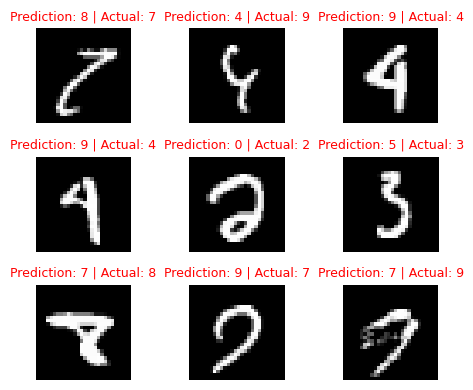

In [57]:
random.seed(7)

fig = plt.figure(figsize=(5, 4))
rows, cols = 3, 3
for i, idx in enumerate(random.sample(list(wrong_idx), k=rows*cols)):
    sample, label = test_data.data[idx], test_data.targets[idx]
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = y_pred_tensor[idx]
    title_text = f"Prediction: {pred_label} | Actual: {label}"
    plt.title(title_text, fontsize=9, c='r')

    plt.axis(False)
plt.tight_layout()
plt.show()

The most of misclassified examples are really hard to get wright prediction even for people (7/8, 4/9, 0/2).

## 11. Створіть випадковий тензор форми `[1, 3, 64, 64]` і пропустіть його через шар `nn.Conv2d()` з різними налаштуваннями гіперпараметрів (ви можете вибрати будь-які налаштування), що ви помічаєте, якщо параметр `kernel_size` збільшується або зменшується?

In [71]:
torch.manual_seed(7)

test_image = torch.randn(size=(1, 3, 64, 64))
test_image.shape

torch.Size([1, 3, 64, 64])

In [72]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=3,
                       padding=0)

conv_layer(test_image).shape

torch.Size([1, 6, 62, 62])

In [73]:
test_image = torch.randn(size=(1, 3, 64, 64))
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=3,
                       padding='same')

conv_layer(test_image).shape

torch.Size([1, 6, 64, 64])

In [74]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=2,
                       padding=0)

conv_layer(test_image).shape

torch.Size([1, 6, 63, 63])

In [78]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=5,
                       padding=2)

conv_layer(test_image).shape

torch.Size([1, 6, 64, 64])

In [77]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=5,
                       padding=0)

conv_layer(test_image).shape

torch.Size([1, 6, 60, 60])

In [87]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=7,
                       padding=0)

conv_layer(test_image).shape

torch.Size([1, 6, 58, 58])

In [88]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=7,
                       padding='valid')

conv_layer(test_image).shape

torch.Size([1, 6, 58, 58])

In [89]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=7)

conv_layer(test_image).shape

torch.Size([1, 6, 58, 58])

In [97]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=4,
                       stride=1,
                       padding='same')

conv_layer(test_image).shape

torch.Size([1, 6, 64, 64])

In [100]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=4,
                       stride=2)

conv_layer(test_image).shape

torch.Size([1, 6, 31, 31])

In [99]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=4,
                       stride=2,
                       padding=2)

conv_layer(test_image).shape

torch.Size([1, 6, 33, 33])

In [92]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=4,
                       stride=3)

conv_layer(test_image).shape

torch.Size([1, 6, 21, 21])

In convolutional operations, increasing the kernel size reduces the output image dimensions, while decreasing the kernel size results in a larger output shape.